In [1]:
# imports the neccessary python modules
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import matplotlib.pyplot as plt
%matplotlib inline
#
import pandas as pd
import xlrd
import seaborn as sns

In [17]:
# reads in the master defects data
master_data = pd.read_excel("/Users/nialdaly/Downloads/Master Defect File.xlsx", 'Stats Graphs Info')

master_data.head()

,Defect ID,Defect Status,Defect Severity,Description / Comment,Requirements,Section2,Section3
0,WEBSITE_PAG_DEF1,Open,Minor,Non registered user has access to Staff Landin...,2.1/R2 \n,S2.1,NaN
1,NAVIGATION_PAG_DEF1,Open,Major,Navigation does not meet minimum requirements ...,2.2/R6 3.1/R62 3.3/R72 3.4/R74 3.5/R77,S2.2,S3.4
2,Home_Pag_Defect01,Open,Major,The News story does not refresh and instead th...,S2.3/R10,S2.3,NaN
3,Home_Pag_Defect02,Open,Major,The News stories tested do not appear in chron...,S2.3/R11,S2.3,NaN
4,Home_Pag_Defect03,Open,Major,The News story initially appears with a headli...,S2.3/R13,S2.3,NaN


In [4]:
# converts the Section2 and Section3 column data to string
master_data['Section2'] = master_data['Section2'].astype('str')
# converts the requirements column data to string
master_data['Section3'] = master_data['Section3'].astype('str')

In [5]:
# Section 2
section2 = master_data[master_data['Section2'].str.contains('2.')]
section2 = section2.reset_index(drop=True)

section2.head()

,Defect ID,Defect Status,Defect Severity,Description / Comment,Requirements,Section2,Section3
0,WEBSITE_PAG_DEF1,Open,Minor,Non registered user has access to Staff Landin...,2.1/R2 \n,S2.1,nan
1,NAVIGATION_PAG_DEF1,Open,Major,Navigation does not meet minimum requirements ...,2.2/R6 3.1/R62 3.3/R72 3.4/R74 3.5/R77,S2.2,S3.4
2,Home_Pag_Defect01,Open,Major,The News story does not refresh and instead th...,S2.3/R10,S2.3,nan
3,Home_Pag_Defect02,Open,Major,The News stories tested do not appear in chron...,S2.3/R11,S2.3,nan
4,Home_Pag_Defect03,Open,Major,The News story initially appears with a headli...,S2.3/R13,S2.3,nan


In [6]:
# Section 3
section3 = master_data[master_data['Section3'].str.contains('3.')]
section3 = section3.reset_index(drop=True)
section3.sort_values(by=['Section3'])

section3.head()

,Defect ID,Defect Status,Defect Severity,Description / Comment,Requirements,Section2,Section3
0,NAVIGATION_PAG_DEF1,Open,Major,Navigation does not meet minimum requirements ...,2.2/R6 3.1/R62 3.3/R72 3.4/R74 3.5/R77,S2.2,S3.4
1,Home_Pag_Defect06,Open,Major,The Belfast City Council logo is missing from ...,S2.3/R59\nS3.1/R59,nan,S3.1
2,Home_Pag_Defect07,Open,Major,The main corporate colour of the home page is ...,S2.3/R59\nS3.1/R59,nan,S3.1
3,Home_Pag_Defect08,Open,Minor,No characters listed in the expected result ar...,S2.3/R59\nS3.1/R59,nan,S3.1
4,Home_Pag_Defect09,Open,Major,The QUZoo logo is missing from the footer of t...,S2.3/R60\nS3.1/R60,nan,S3.1


In [7]:
section2.groupby(['Section2', 'Defect Severity']).size()

Section2   Defect Severity
S2.1       Major               1
           Minor               2
S2.11      Major               1
S2.12      Critical            3
           Major              11
           Minor               2
S2.13      Critical            1
           Major               8
           Minor               2
           Trivial             3
S2.2       Major               1
S2.3       Major               3
S2.4       Critical            1
           Major               1
S2.5       Trivial             1
S2.6       Major               5
           Minor               1
           Trivial             3
S2.8       Critical            2
           Major               1
           Trivial             1
S2.9/2.10  Critical            2
           Major              10
           Minor               2
dtype: int64

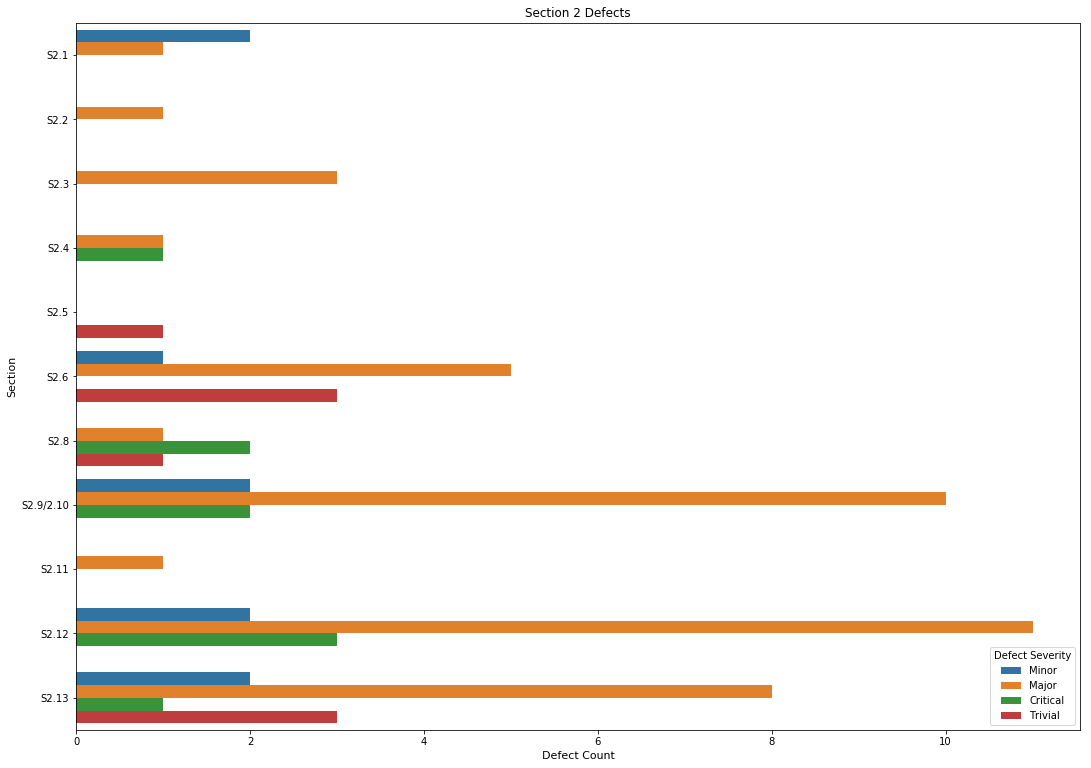

In [8]:
# Section 2 defects plot, breakdown per defect severity
defects_plt_s2 = plt.figure(figsize=(18,13))
defects_plt_s2 = sns.countplot(y="Section2", hue="Defect Severity", data=section2)

plt.xlabel('Defect Count', fontsize=11)
plt.ylabel('Section', fontsize=11)
plt.title('Section 2 Defects');

defects_plt_s2

In [9]:
section3.groupby(['Section3', 'Defect Severity']).size()

Section3  Defect Severity
S3.1      Major              16
          Minor              12
          Trivial             1
S3.2      Critical            2
          Major              12
          Minor               3
S3.3      Major               3
S3.4      Critical            1
          Major               1
S3.5      Major               5
          Minor               5
          Trivial             2
dtype: int64

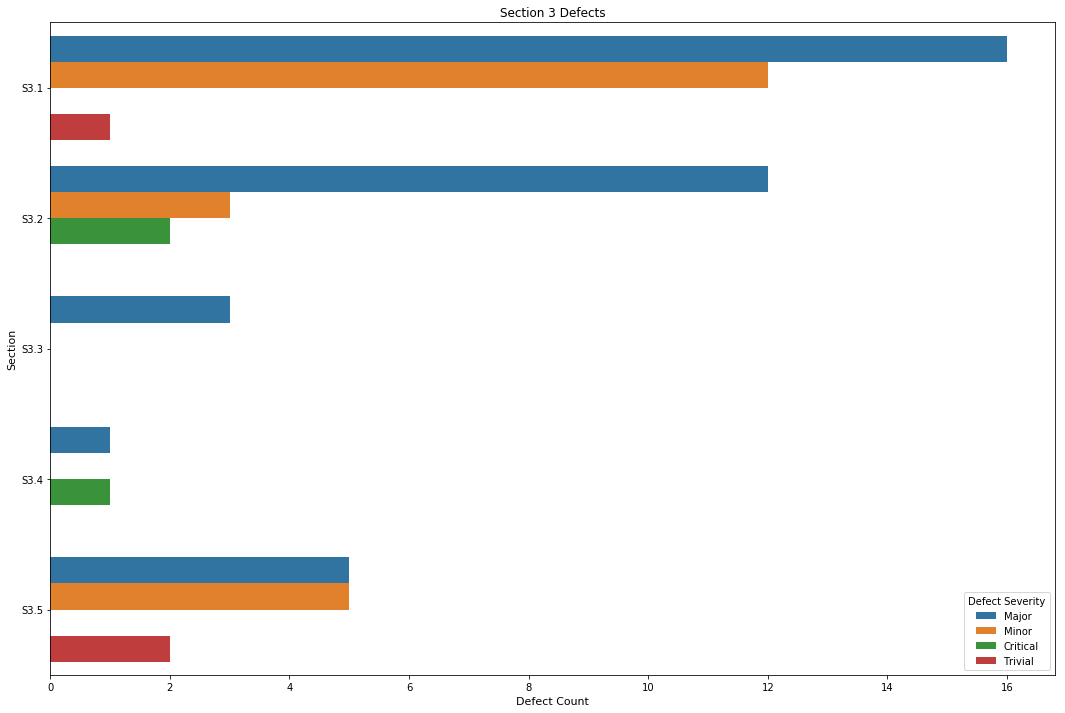

In [10]:
# Section 3 defects plot, breakdown per defect severity
defects_plt_s3 = plt.figure(figsize=(18,12))
defects_plt_s3 = sns.countplot(y="Section3", hue="Defect Severity", data=section3, order=['S3.1','S3.2', 'S3.3', 'S3.4', 'S3.5'])

plt.xlabel('Defect Count', fontsize=11)
plt.ylabel('Section', fontsize=11)
plt.title('Section 3 Defects');

defects_plt_s3

In [11]:
# read in the stats data
stats_data = pd.read_csv("/Users/nialdaly/Downloads/Group10 stats.csv")

stats_data.head()

,Section,Test Cases,Total Defects,Percentage,Critical,Major,Minor,Trivial
0,s2.1,38,3,2.29,0,1,2,0
1,s2.2,16,1,0.76,0,1,0,0
2,s2.3,20,3,2.29,0,3,0,0
3,s2.4,18,2,1.53,1,1,0,0
4,s2.5,20,1,0.76,0,0,0,1


In [18]:
# drops unneccessary columns for the plot
cases_vs_defects = stats_data[['Section', 'Test Cases', 'Total Defects']]

# drops the totals row
cases_vs_defects = cases_vs_defects[:-1]

#
cases_vs_defects = (
    cases_vs_defects.set_index('Section')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

cases_vs_defects

,Section,Variable,Value
0,s2.1,Test Cases,38
1,s2.1,Total Defects,3
2,s2.2,Test Cases,16
3,s2.2,Total Defects,1
4,s2.3,Test Cases,20
5,s2.3,Total Defects,3
6,s2.4,Test Cases,18
7,s2.4,Total Defects,2
8,s2.5,Test Cases,20
9,s2.5,Total Defects,1


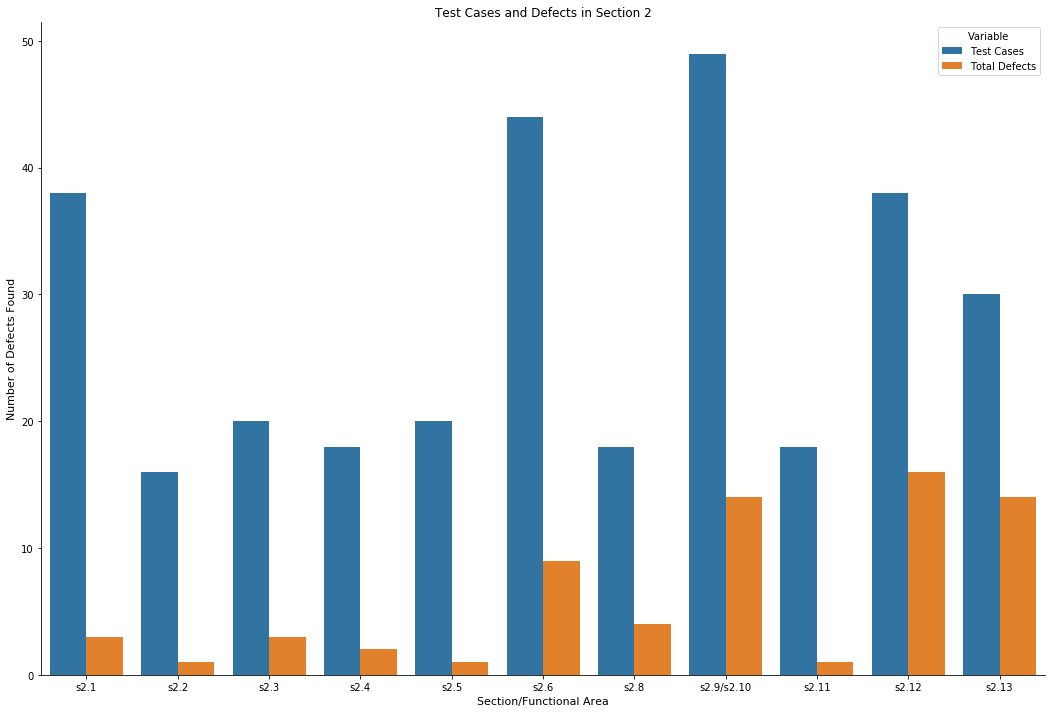

In [19]:
# SECTION 2
cases_vs_defects_s2 = cases_vs_defects[cases_vs_defects['Section'].str.contains('2.')]
cases_vs_defects_s2 = cases_vs_defects_s2.reset_index(drop=True)

#
fig, ax1 = plt.subplots(figsize=(18, 12))

section2_plt = sns.barplot(x='Section', y='Value', hue='Variable', data=cases_vs_defects_s2, ax=ax1)
sns.despine(fig)


plt.xlabel('Section/Functional Area', fontsize=11)
plt.ylabel('Number of Defects Found', fontsize=11)
plt.title('Test Cases and Defects in Section 2');

section2_plt

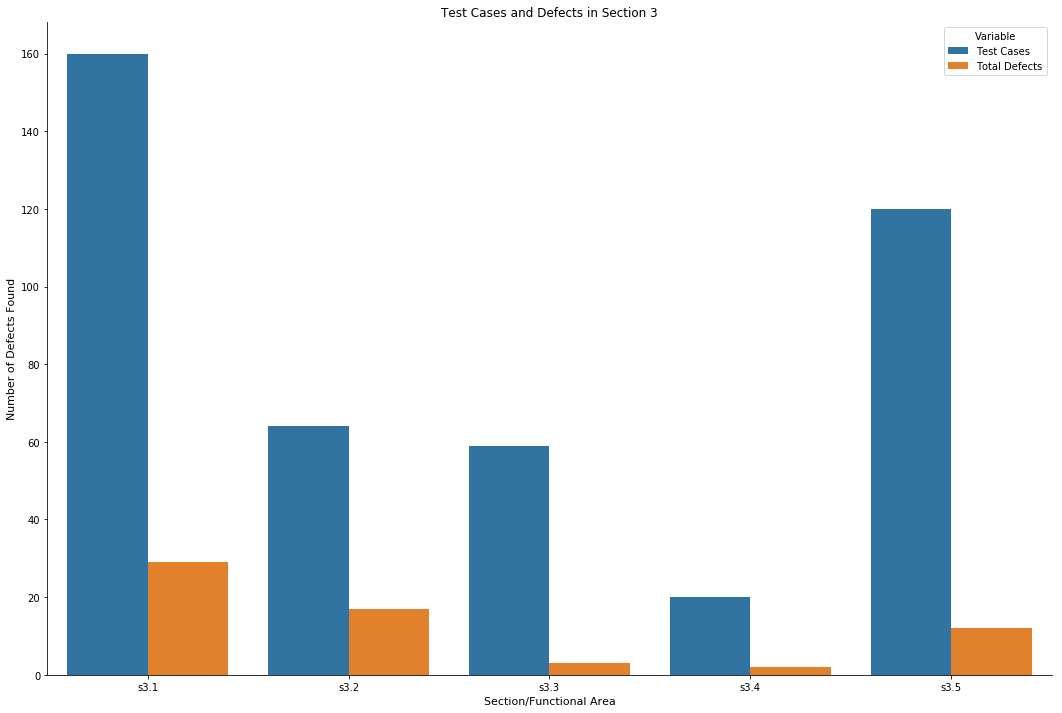

In [14]:
# SECTION 3
cases_vs_defects_s3 = cases_vs_defects[cases_vs_defects['Section'].str.contains('3.')]
cases_vs_defects_s3 = cases_vs_defects_s3.reset_index(drop=True)

#
fig, ax2 = plt.subplots(figsize=(18, 12))

section3_plt = sns.barplot(x='Section', y='Value', hue='Variable', data=cases_vs_defects_s3, ax=ax2)
sns.despine(fig)


plt.xlabel('Section/Functional Area', fontsize=11)
plt.ylabel('Number of Defects Found', fontsize=11)
plt.title('Test Cases and Defects in Section 3');

section2_plt

In [20]:
#
defect_clusters = stats_data[['Section', 'Total Defects', 'Percentage']]

# drops the totals row
defect_clusters = defect_clusters[:-1]

defect_clusters

,Section,Total Defects,Percentage
0,s2.1,3,2.29
1,s2.2,1,0.76
2,s2.3,3,2.29
3,s2.4,2,1.53
4,s2.5,1,0.76
5,s2.6,9,6.87
6,s2.8,4,3.05
7,s2.9/s2.10,14,10.69
8,s2.11,1,0.76
9,s2.12,16,12.21


In [27]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = defect_clusters['Section'].unique()

sizes = defect_clusters['Total Defects'].tolist();

trace = go.Pie(labels=labels, values=sizes, pull=.2, hole=.1, textinfo='value+percent')

py.iplot([trace], filename='basic_pie_chart')

#ADDS DEFECT CLUSTER TTTLE